In [1]:
import numpy as np

# Save fonts into pdf
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio

import sys
sys.path.append('../../tools/')
import fitting_functions

import matplotlib.colors

In [2]:
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

In [ ]:
# Load R interface to do statistics
import rpy2.rinterface
%load_ext rpy2.ipython

In [5]:
# Set rcParams
matplotlib.rcParams.update({'font.size': 8, 'axes.linewidth': 0.5, 'xtick.major.width': 0.5, 'xtick.minor.width': 0.5, 
                            'ytick.major.width': 0.5,'ytick.minor.width': 0.5, 'xtick.major.pad':2,'ytick.major.pad':2})
matplotlib.rcParams.update({'font.family':'sans-serif','font.sans-serif':['Arial'], 'mathtext.default':'sf','mathtext.fontset':'custom'})

matplotlib.rcParams.update({'savefig.transparent':True})

In [6]:
ms222_traces = ['091311a', '091311b', '091311c', '091311d', '091311e', '091311f', '091411a', '091411d', '091411e', '091411f']
ketamine_traces = ['63011d','70911i', '70911l', '70911m', '82411p', '82411r']

# MS-222 Traces

## Summary plots

### Goodness-of-fit

In [7]:
max_num_components = 6

best_fits_mse = np.zeros((len(ms222_traces), max_num_components))
best_fits_ll = np.zeros((len(ms222_traces), max_num_components))

for fish_num in range(len(ms222_traces)):
    fit_file = sio.loadmat('fit/results/MS-222/'+ms222_traces[fish_num]+'.mat')
    sses = fit_file['sses']
    lls = fit_file['lls']
    
    best_fit_num = np.argmax(lls, axis=1)
    best_fits_ll[fish_num,:] = np.max(lls, axis=1)
    # 4152 = num of data points in each recording
    best_fits_mse[fish_num,:] = np.array([sses[i, best_fit_num[i]] for i in range(max_num_components)])/(2*4152)

### Percent change in MSE across all fish

In [8]:
mse_pct_change = (best_fits_mse[:, 1:] - best_fits_mse[:, :-1])/best_fits_mse[:, :-1]
# ll_pct_change = (best_fits_ll[:, 1:] - best_fits_ll[:, :-1])/best_fits_ll[:, :-1]

### Fig. 3B: Median MSE and %change in MSE

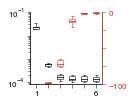

In [9]:
plt.figure(figsize=(1.55, 1.3))

ax = plt.gca()
ax.set_yscale('log')
plt.boxplot(best_fits_mse, whis=(0,100), widths=0.5, medianprops={'c':'k', 'linewidth':0.75},
            boxprops={'linewidth':0.5}, whiskerprops={'linewidth':0.5}, capprops={'linewidth':0.5});

plt.ylim([0.8e-4, 1e-1])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs='all',numticks=5)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_yticks([1e-4, 1e-3, 1e-2, 1e-1])
ax.set_yticklabels([r'$10^{-4}$', '', '', r'$10^{-1}$'])

ax2 = ax.twinx()
plt.boxplot(mse_pct_change, positions=np.arange(2,7), whis=(0,100), widths=0.5, medianprops={'c':'C3', 'linewidth':0.75},
            boxprops={'c':'C3', 'linewidth':0.5}, whiskerprops={'c':'C3','linewidth':0.5}, 
            capprops={'c':'C3', 'linewidth':0.5});
ax2.set_ylim([-1, 0])
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_color(red_c)
ax2.spines['top'].set_visible(False)

ax2.tick_params(axis='y', colors=red_c, which='both')

ax2.set_yticks(np.linspace(-1, 0, 5))
ax2.set_yticklabels([r'$-100$', '', '', '',r'$0$'])

plt.xticks(np.arange(1,7), ['1','','','','','6'])

plt.subplots_adjust(left=0.19, right=0.84, bottom=0.18, top=0.95)

Using the "elbow test," it appears that the fit stops improving visibly beyond 4 components.

### Parameter summary

In [21]:
best_fits_short = np.zeros((len(ms222_traces), 8))
best_fits_long = np.zeros((len(ms222_traces), 8))

best_fits_short_3 = np.zeros((len(ms222_traces), 6))
best_fits_long_3 = np.zeros((len(ms222_traces), 6))
for fish_num in range(len(ms222_traces)):
    fit_file = sio.loadmat('fit/results/MS-222/'+ms222_traces[fish_num]+'.mat')
    lls = fit_file['lls']
    fits = fit_file['fits']
    best_fit_num = np.argmin(lls[3,:])
    best_fits_short[fish_num,:] = fits[3,0][best_fit_num,:]
    best_fits_long[fish_num,:] = fits[3,1][best_fit_num,:]
    
    best_fit_num_3 = np.argmin(lls[2,:])
    best_fits_short_3[fish_num,:] = fits[2,0][best_fit_num_3,:]
    best_fits_long_3[fish_num,:] = fits[2,1][best_fit_num_3,:]

In [9]:
## Time constants statistics for 4-component fits

timeconstants = 1/best_fits_short[:,4:]
print("25%ile:", np.percentile(timeconstants, 25, axis=0))
print("Median:", np.median(timeconstants, axis=0))
print("75%ile:", np.percentile(timeconstants, 75, axis=0))

25%ile: [7.11415127e-02 9.60745574e-01 7.04035935e+00 8.14722241e+01]
Median: [ 0.09261635  1.34376339  7.95394531 91.60033837]
75%ile: [1.11304968e-01 1.52784216e+00 1.08191622e+01 1.11430333e+02]


In [42]:
coeffs_short = best_fits_short[:, :4]
coeffs_long = best_fits_long[:, :4]

### Figure 3D: parameter summary plot

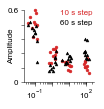

In [44]:
fig = plt.figure(figsize=(1.25,1.3))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale('log')
plt.ylim([0, 0.6])
plt.yticks(np.linspace(0, 0.6, 6))
ax.set_yticklabels([0, '', '', '', '', 0.6 ])
ax.set_xticks([1e-2, 1e-1, 1, 1e1, 1e2])

plt.scatter(timeconstants, coeffs_short, facecolor='C3', marker='o', s=8, linewidth=0.5, label='10 s step', clip_on=False)
plt.scatter(timeconstants, coeffs_long, facecolor='k', marker='^', s=8,linewidth=0.5, label='60 s step', clip_on=False)

ax.get_xaxis().set_minor_locator(ticker.LogLocator(numticks=5, subs='all'))
ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())

ax.set_xticks([1e-1, 1e0, 1e1, 1e2])
ax.set_xticklabels([r'$10^{-1}$','','',r'$10^{2}$'])

plt.figtext(0.6, 0.9, '10 s step', color='C3')
plt.figtext(0.6, 0.8, '60 s step')

plt.ylabel('Amplitude', labelpad=-7)
plt.subplots_adjust(left = 0.2, top = 0.95, bottom=0.18, right=0.98)

Note that fish no. 091311c has fastest timeconstant equal to the lower bound, =43.2 ms

## Fig. 3A: example traces

In [12]:
example_trace = ms222_traces[0]

# Import data
trange, pe_short, pe_long = fitting_functions.importDataMS222('../../data/anesthetized/fixed/MS-222/'+example_trace+'.mat')

# Import fit
fit_file = sio.loadmat('fit/results/MS-222/'+example_trace+'.mat')
lls = fit_file['lls']
fits = fit_file['fits']
best_fit_inds = np.argmin(lls, axis=1)

best_models_short_example = np.zeros((3, len(trange)))
best_models_long_example = np.zeros((3, len(trange)))

best_models_short_example[0,:] = fitting_functions.exponentialModel(trange, fits[0,0][best_fit_inds[0],:])
best_models_short_example[1,:] = fitting_functions.exponentialModel(trange, fits[1,0][best_fit_inds[1],:])
best_models_short_example[2,:] = fitting_functions.exponentialModel(trange, fits[3,0][best_fit_inds[3],:])

best_models_long_example[0,:] = fitting_functions.exponentialModel(trange, fits[0,1][best_fit_inds[0],:])
best_models_long_example[1,:] = fitting_functions.exponentialModel(trange, fits[1,1][best_fit_inds[1],:])
best_models_long_example[2,:] = fitting_functions.exponentialModel(trange, fits[3,1][best_fit_inds[3],:])

fit_file = sio.loadmat('fit/results/MS-222/'+example_trace+'_10s.mat')
lls = fit_file['lls']
fits = fit_file['fits']
best_fit_ind = np.nanargmax(lls[3,:])

best_models_short_bounded = fitting_functions.exponentialModel(trange, fits[3,0][best_fit_ind,:])
best_models_long_bounded = fitting_functions.exponentialModel(trange, fits[3,1][best_fit_ind,:])

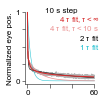

In [13]:
fig = plt.figure(figsize=(1.3,1.3))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(trange, pe_short, color=(0.7, 0.7, 0.7, 1), clip_on=False, solid_capstyle='butt', lw=1)

plt.plot(trange, best_models_short_example[0,:],c='C9', linewidth=0.5, clip_on=False)
plt.plot(trange, best_models_short_example[1,:],c='k', linewidth=0.5)

plt.plot(trange, best_models_short_bounded, c=red_l, linewidth=0.75, clip_on=False)

plt.plot(trange, best_models_short_example[2,:], c='C3', linewidth=1)

plt.ylabel('Normalized eye pos.', labelpad=2)
plt.xlim([-2, 60])
plt.ylim([-0.05,1])

ax.set_xticks([0, 20, 40, 60])
ax.set_xticklabels([0, '','',60])
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels([0, '','','',1])

plt.figtext(0.6, 0.95, '10 s step', ha='center')

plt.figtext(1, 0.85, r'4 $\tau$ fit, $\tau < \infty$', color=red_c, ha='right')
plt.figtext(1, 0.75, r'4 $\tau$ fit, $\tau < 10$ s', color=red_l, ha='right')
plt.figtext(1, 0.65, r'2 $\tau$ fit', ha='right')
plt.figtext(1, 0.55, r'1 $\tau$ fit', color='C9', ha='right')

plt.subplots_adjust(left = 0.21, top = 0.95, bottom=0.18, right=0.95)

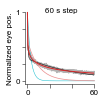

In [14]:
fig = plt.figure(figsize=(1.3,1.3))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(trange, pe_long, color=(0.7, 0.7, 0.7, 1), label='Data', clip_on=False, solid_capstyle='butt', lw=1)
plt.plot(trange, best_models_long_example[0,:],c='C9', linewidth=0.5, clip_on=False, label=r'1 $\tau$ fit')
plt.plot(trange, best_models_long_example[1,:],c='k', linewidth=0.5 , label=r'2 $\tau$ fit')
plt.plot(trange, best_models_long_bounded, c=red_l, linewidth=0.75, clip_on=False)

plt.plot(trange, best_models_long_example[2,:], label=r'4 $\tau$ fit', c='C3', linewidth=1)


plt.ylabel('Normalized eye pos.', labelpad=2)
plt.xlim([-2, 60])
plt.ylim([-0.05,1])
# xlims = plt.xlim()
ax.set_xticks([0, 20, 40, 60])
ax.set_xticklabels([0, '','',60])
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels([0, '','','',1])


plt.figtext(0.6, 0.95, '60 s step', ha='center')

plt.subplots_adjust(left = 0.21, top = 0.95, bottom=0.18, right=0.95, wspace=0.3)

## Summary of fits with time constants constrained to be < 10 s

In [17]:
max_num_components = 6

best_fits_mse_10s = np.zeros((len(ms222_traces), max_num_components))
# best_fits_ll_10s = np.zeros((len(ms222_traces), max_num_components))

for fish_num in range(len(ms222_traces)):
    fit_file = sio.loadmat('fit/results/MS-222/'+ms222_traces[fish_num]+'_10s.mat')
    sses = fit_file['sses']
    lls = fit_file['lls']
    
    best_fit_num = np.nanargmax(lls, axis=1)
    # best_fits_ll_10s[fish_num,:] = np.nanmax(lls, axis=1)
    best_fits_mse_10s[fish_num,:] = np.array([sses[i, best_fit_num[i]] for i in range(max_num_components)])/(2*4152)

In [18]:
best_fits_mse_ratios = best_fits_mse_10s/best_fits_mse

In [19]:
np.median(best_fits_mse_ratios[:,3])

71.65144663507084

In [20]:
[np.min(best_fits_mse_ratios[:,3]), np.max(best_fits_mse_ratios[:,3])]

[39.426961765146785, 172.4277174066627]

# Ketamine Traces

## Summary plots

### Goodness-of-fit

In [22]:
max_num_components = 6

best_fits_mse = np.zeros((len(ketamine_traces), max_num_components))
best_fits_ll = np.zeros((len(ketamine_traces), max_num_components))

for fish_num in range(len(ketamine_traces)):
    fit_file = sio.loadmat('fit/results/Ketamine/'+ketamine_traces[fish_num]+'.mat')
    sses = fit_file['sses']
    lls = fit_file['lls']
    
    best_fit_num = np.argmax(lls, axis=1)
    best_fits_ll[fish_num,:] = np.max(lls, axis=1)
    best_fits_mse[fish_num,:] = np.array([sses[i, best_fit_num[i]] for i in range(max_num_components)])/(2*4152)

In [23]:
mse_pct_change = (best_fits_mse[:, 1:] - best_fits_mse[:, :-1])/best_fits_mse[:, :-1]
ll_pct_change = (best_fits_ll[:, 1:] - best_fits_ll[:, :-1])/best_fits_ll[:, :-1]

### Figure 3E: MSE and % change in MSE

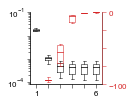

In [24]:
plt.figure(figsize=(1.55, 1.3))

ax = plt.gca()
ax.set_yscale('log')
plt.boxplot(best_fits_mse, positions = np.arange(1,7), whis=(0,100), widths=0.5, medianprops={'c':'k', 'linewidth':0.75},
            boxprops={'linewidth':0.5}, whiskerprops={'linewidth':0.5}, capprops={'linewidth':0.5});

plt.ylim([0.8e-4, 1e-1])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs='all',numticks=5)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_yticks([1e-4, 1e-3, 1e-2, 1e-1])
ax.set_yticklabels([r'$10^{-4}$', '', '', r'$10^{-1}$'])

ax2 = ax.twinx()
plt.boxplot(mse_pct_change, positions=np.arange(2,7), whis=(0,100), widths=0.5, medianprops={'c':'C3', 'linewidth':0.75},
            boxprops={'c':'C3', 'linewidth':0.5}, whiskerprops={'c':'C3','linewidth':0.5}, 
            capprops={'c':'C3', 'linewidth':0.5});
ax2.set_ylim([-1, 0])
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_color(red_c)
ax2.spines['top'].set_visible(False)

ax2.tick_params(axis='y', colors=red_c, which='both')

# ax2.set_ylabel('% change in MSE', labelpad=-10, ha='center', color='C3')
ax2.set_yticks(np.linspace(-1, 0, 5))
ax2.set_yticklabels([r'$-100$', '', '', '',r'$0$'])

plt.xticks(np.arange(1,7), ['1','','','','','6'])

plt.subplots_adjust(left=0.19, right=0.84, bottom=0.18, top=0.95)

Using the "elbow test," it appears that the fit stops improving visibly beyond 4 components.

### Parameter summary

In [24]:
best_fits_short = np.zeros((len(ketamine_traces), 8))
best_fits_long = np.zeros((len(ketamine_traces), 8))
for fish_num in range(len(ketamine_traces)):
    fit_file = sio.loadmat('fit/results/Ketamine/'+ketamine_traces[fish_num]+'.mat')
    lls = fit_file['lls']
    fits = fit_file['fits']
    best_fit_num = np.argmin(lls[3,:])
    best_fits_short[fish_num,:] = fits[3,0][best_fit_num,:]
    best_fits_long[fish_num,:] = fits[3,1][best_fit_num,:]

In [11]:
timeconstants = 1/best_fits_short[:,4:]
print("25%ile:", np.percentile(timeconstants, 25, axis=0))
print("Median:", np.median(timeconstants, axis=0))
print("75%ile:", np.percentile(timeconstants, 75, axis=0))

25%ile: [  0.11408483   1.64952864  10.29496005 104.30935317]
Median: [  0.1305245    2.00559537  10.73104259 110.20747194]
75%ile: [  0.13170255   2.08104541  12.04163542 117.94092344]


In [93]:
coeffs_short = best_fits_short[:, :4]
coeffs_long = best_fits_long[:, :4]

### Figure 3F: parameter summary plot

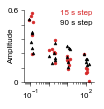

In [95]:
fig = plt.figure(figsize=(1.25,1.3))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale('log')
plt.ylim([0, 0.6])
plt.yticks(np.linspace(0, 0.6, 6))
ax.set_yticklabels([0, '', '', '', '', 0.6 ])
ax.set_xticks([1e-2, 1e-1, 1, 1e1, 1e2])

plt.scatter(timeconstants, coeffs_short, facecolor='C3', marker='o', s=8, linewidth=0.5, label='10 s step', clip_on=False)
plt.scatter(timeconstants, coeffs_long, facecolor='k', marker='^', s=8,linewidth=0.5, label='60 s step', clip_on=False)

ax.get_xaxis().set_minor_locator(ticker.LogLocator(numticks=5, subs='all'))
ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())

ax.set_xticks([1e-1, 1e0, 1e1, 1e2])
ax.set_xticklabels([r'$10^{-1}$','','',r'$10^{2}$'])

plt.figtext(0.6, 0.9, '15 s step', color=red_c)
plt.figtext(0.6, 0.8, '90 s step')

plt.ylabel('Amplitude', labelpad=-7)
plt.subplots_adjust(left = 0.2, top = 0.95, bottom=0.18, right=0.98)

## Figure 3D: example traces

In [69]:
example_trace = ketamine_traces[0]

# Import data
trange, pe_short, pe_long = importDataKetamine('../../data/anesthetized/fixed/Ketamine/'+example_trace+'.mat')

# Import fit
fit_file = sio.loadmat('fit/results/Ketamine/'+example_trace+'.mat')
lls = fit_file['lls']
fits = fit_file['fits']
best_fit_inds = np.argmin(lls, axis=1)

best_models_short_example = np.zeros((3, len(trange)))
best_models_long_example = np.zeros((3, len(trange)))

best_models_short_example[0,:] = fitting_functions.exponentialModel(trange, fits[0,0][best_fit_inds[0],:])
best_models_short_example[1,:] = fitting_functions.exponentialModel(trange, fits[1,0][best_fit_inds[1],:])
best_models_short_example[2,:] = fitting_functions.exponentialModel(trange, fits[3,0][best_fit_inds[3],:])

best_models_long_example[0,:] = fitting_functions.exponentialModel(trange, fits[0,1][best_fit_inds[0],:])
best_models_long_example[1,:] = fitting_functions.exponentialModel(trange, fits[1,1][best_fit_inds[1],:])
best_models_long_example[2,:] = fitting_functions.exponentialModel(trange, fits[3,1][best_fit_inds[3],:])

fit_file = sio.loadmat('fit/results/Ketamine/'+example_trace+'_10s.mat')
lls = fit_file['lls']
fits = fit_file['fits']
best_fit_ind = np.nanargmax(lls[3,:])

best_models_short_bounded = fitting_functions.exponentialModel(trange, fits[3,0][best_fit_ind,:])
best_models_long_bounded = fitting_functions.exponentialModel(trange, fits[3,1][best_fit_ind,:])

### 15 s step

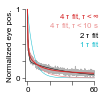

In [72]:
fig = plt.figure(figsize=(1.3,1.3))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(trange, pe_short, color=(0.7, 0.7, 0.7, 1), label='Data', clip_on=False, solid_capstyle='butt', lw=1)

plt.plot(trange, best_models_short_example[0,:],c='C9', linewidth=0.5, clip_on=False, label=r'1 $\tau$ fit')
plt.plot(trange, best_models_short_example[1,:],c='k', linewidth=0.5 , label=r'2 $\tau$ fit')

plt.plot(trange, best_models_short_bounded, c=red_l, linewidth=0.75, clip_on=False)

plt.plot(trange, best_models_short_example[2,:], label=r'4 $\tau$ fit', c='C3', linewidth=1)

plt.ylabel('Normalized eye pos.', labelpad=2)
plt.xlim([-2, 60])
plt.ylim([-0.05,1])

ax.set_xticks([0, 20, 40, 60])
ax.set_xticklabels([0, '','',60])
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels([0, '','','',1])


plt.figtext(1, 0.85, r'4 $\tau$ fit, $\tau < \infty$', color=red_c, ha='right')
plt.figtext(1, 0.75, r'4 $\tau$ fit, $\tau < 10$ s', color=red_l, ha='right')
plt.figtext(1, 0.65, r'2 $\tau$ fit', ha='right')
plt.figtext(1, 0.55, r'1 $\tau$ fit', color='C9', ha='right')


plt.subplots_adjust(left = 0.21, top = 0.95, bottom=0.18, right=0.95)

### 90 s step

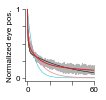

In [73]:
fig = plt.figure(figsize=(1.3,1.3))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(trange, pe_long, color=(0.7, 0.7, 0.7, 1), label='Data', clip_on=False, solid_capstyle='butt', lw=1)
plt.plot(trange, best_models_long_example[0,:],c='C9', linewidth=0.5, clip_on=False, label=r'1 $\tau$ fit')
plt.plot(trange, best_models_long_example[1,:],c='k', linewidth=0.5 , label=r'2 $\tau$ fit')


plt.plot(trange, best_models_long_bounded, c=red_l, linewidth=0.75, clip_on=False)

plt.plot(trange, best_models_long_example[2,:], label=r'4 $\tau$ fit', c='C3', linewidth=1)

plt.ylabel('Normalized eye pos.', labelpad=2)
plt.xlim([-2, 60])
plt.ylim([-0.05,1])
# xlims = plt.xlim()
ax.set_xticks([0, 20, 40, 60])
ax.set_xticklabels([0, '','',60])
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels([0, '','','',1])


plt.subplots_adjust(left = 0.21, top = 0.95, bottom=0.18, right=0.95, wspace=0.3)

## Summary of fits with time constants constrained to be < 10 s

In [26]:
max_num_components = 6

best_fits_mse_10s = np.zeros((len(ketamine_traces), max_num_components))
# best_fits_ll_10s = np.zeros((len(ketamine_traces), max_num_components))

for fish_num in range(len(ketamine_traces)):
    fit_file = sio.loadmat('fit/results/Ketamine/'+ketamine_traces[fish_num]+'_10s.mat')
    sses = fit_file['sses']
    lls = fit_file['lls']
    
    best_fit_num = np.nanargmax(lls, axis=1)
    # best_fits_ll_10s[fish_num,:] = np.nanmax(lls, axis=1)
    best_fits_mse_10s[fish_num,:] = np.array([sses[i, best_fit_num[i]] for i in range(max_num_components)])/(2*4152)

In [27]:
best_fits_mse_ratios = best_fits_mse_10s / best_fits_mse

In [28]:
np.median(best_fits_mse_ratios[:,3])

20.876717970261062

In [29]:
[np.min(best_fits_mse_ratios[:,3]), np.max(best_fits_mse_ratios[:,3])]

[7.901730401885949, 58.06433717306732]